Measurement results:  {'11': 1000}


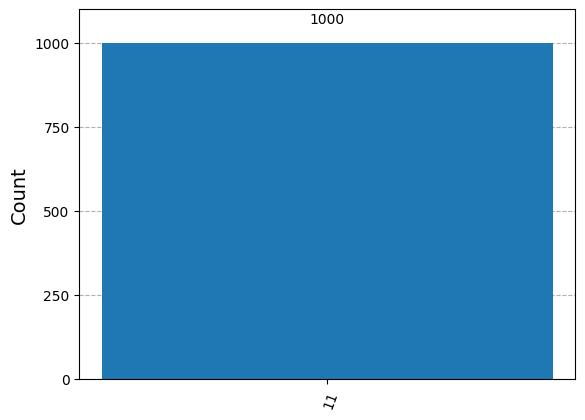

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

def oracle(circuit):
    circuit.cz(0,1) #mark the state |11> 

def diffusion_operator(circuit):
    circuit.h([0,1])
    circuit.x([0,1])
    circuit.cz(0,1)
    circuit.x([0,1])
    circuit.h([0,1])

def grover_algorithm():
    circuit = QuantumCircuit(2,2)
    circuit.h([0,1])
    oracle(circuit)
    diffusion_operator(circuit)
    circuit.measure([0,1],[0,1])
    return circuit

circuit = grover_algorithm()
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)
result = simulator.run(transpiled_circuit,shots=1000).result()
counts = result.get_counts(circuit)
print("Measurement results: ", counts)

plot_histogram(counts)
plt.show()